In [2]:
import pandas as pd

# Load the datasets
df_studentAssessment = pd.read_csv("studentAssessment.csv")
df_studentInfo = pd.read_csv("studentInfo.csv")

# Make a copy of the original studentInfo dataset
df_studentInfo_original = df_studentInfo.copy()

df_studentInfo_original.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [5]:
# Remove students with final_result = 'Withdrawn'
df_studentInfo = df_studentInfo[df_studentInfo['final_result'] != 'Withdrawn']

# Keep only students from module 'FFF'
df_studentInfo = df_studentInfo[df_studentInfo['code_module'] == 'FFF']

# Reset index after filtering
df_studentInfo.reset_index(drop=True, inplace=True)

# Display the cleaned dataset
print(df_studentInfo['final_result'].value_counts())

df_studentInfo.head()

final_result
Pass           2978
Fail           1711
Distinction     670
Name: count, dtype: int64


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,FFF,2013B,33915,F,South East Region,A Level or Equivalent,30-40%,0-35,0,60,N,Distinction
1,FFF,2013B,35544,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass
2,FFF,2013B,35860,M,South West Region,A Level or Equivalent,10-20,0-35,0,60,N,Pass
3,FFF,2013B,37298,M,Ireland,HE Qualification,NaN,0-35,0,120,N,Pass
4,FFF,2013B,42668,M,London Region,Lower Than A Level,10-20,35-55,1,120,N,Pass


In [6]:
# Merge the filtered df_studentInfo with df_studentAssessment
merged_df = pd.merge(df_studentInfo, df_studentAssessment, on='id_student')

# Display first few rows of the cleaned merged dataset
merged_df.head()


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,id_assessment,date_submitted,is_banked,score
0,FFF,2013B,33915,F,South East Region,A Level or Equivalent,30-40%,0-35,0,60,N,Distinction,34860,17,0,86.0
1,FFF,2013B,33915,F,South East Region,A Level or Equivalent,30-40%,0-35,0,60,N,Distinction,34861,46,0,94.0
2,FFF,2013B,33915,F,South East Region,A Level or Equivalent,30-40%,0-35,0,60,N,Distinction,34862,87,0,93.0
3,FFF,2013B,33915,F,South East Region,A Level or Equivalent,30-40%,0-35,0,60,N,Distinction,34863,131,0,100.0
4,FFF,2013B,33915,F,South East Region,A Level or Equivalent,30-40%,0-35,0,60,N,Distinction,34864,164,0,100.0


In [7]:
# Convert 'final_result' into binary classification labels
merged_df['target'] = merged_df['final_result'].apply(lambda x: 1 if x in ['Pass', 'Distinction'] else 0)

In [8]:
# Selecting relevant features
features = ['score', 'gender', 'region', 'highest_education', 'age_band', 'studied_credits']
X = merged_df[features]
y = merged_df['target']


In [12]:
# Convert categorical features into numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Handle missing values (fill with mode for categorical, mean for numerical)
X.fillna(X.mean(), inplace=True)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


/Users/alan/Desktop/Year 3 Tri 2/INF2008 Machine Learning/ML_Proj/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.metrics import accuracy_score, classification_report

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.8380107870920559
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.10      0.17      1789
           1       0.85      0.98      0.91      9150

    accuracy                           0.84     10939
   macro avg       0.69      0.54      0.54     10939
weighted avg       0.80      0.84      0.79     10939



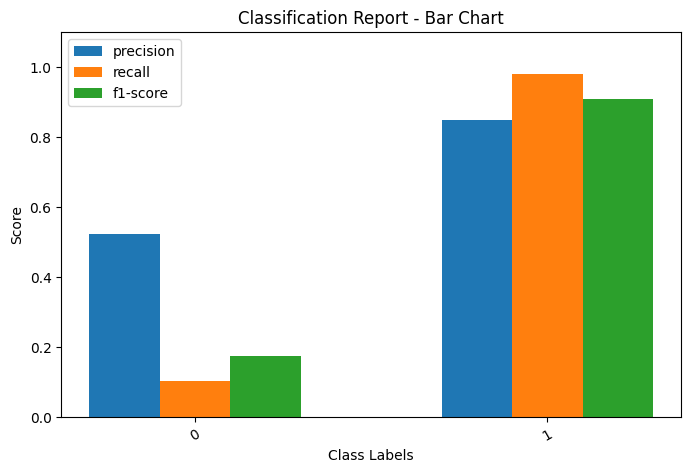

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Generate classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Extract class labels and metrics
classes = list(report_dict.keys())[:-3]  # Exclude avg/total values
metrics = ["precision", "recall", "f1-score"]
values = np.array([[report_dict[cls][metric] for metric in metrics] for cls in classes])

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(8, 5))
x = np.arange(len(classes))
width = 0.2

for i, metric in enumerate(metrics):
    ax.bar(x + i * width, values[:, i], width, label=metric)

# Labels and Title
ax.set_xlabel("Class Labels")
ax.set_ylabel("Score")
ax.set_title("Classification Report - Bar Chart")
ax.set_xticks(x + width)
ax.set_xticklabels(classes)
ax.legend()

# Show plot
plt.xticks(rotation=30)
plt.ylim(0, 1.1)
plt.show()
